In [1]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.datasets
import sklearn.metrics
import sklearn.model_selection

In [2]:
df = pd.read_csv('/tmp/us_home_sales.csv')
df = df[df.saleprice < 4_000_000].reset_index()
df = df[df.saledate < '2017-02-01'].reset_index()
cols = 'saledate saleprice areabuilding bathcount'.split()
df = df[cols]

In [3]:
df.saleprice.max()

2215000

In [4]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    df[['areabuilding', 'bathcount']], df.saleprice, random_state=2)          

In [5]:
lr = LinearRegression()
lr.fit(x_train, y_train)
predicted = lr.predict(x_test)
np.sum(np.abs(y_test - predicted)) / len(y_test)

79186.9560243814

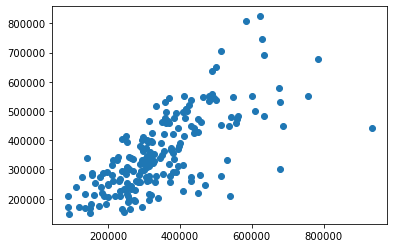

In [6]:
fig, ax = plt.subplots()
ax.scatter(y_test, predicted)